In [1]:
import torch

In [2]:
import torchaudio

In [6]:
a = torchaudio.info('/nvme/zhiyong/vox1/test/wav/id10270/5r0dWxy17C8/00001.wav')

In [8]:
print(a)

AudioMetaData(sample_rate=16000, num_frames=133761, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [17]:
a, b = torchaudio.backend.sox_io_backend.load('/nvme/zhiyong/vox1/test/wav/id10270/5r0dWxy17C8/00001.wav', normalize=False)

In [18]:
a

tensor([[-147, -137,  -86,  ...,  581, 1629, 2023]], dtype=torch.int16)

In [3]:
import scipy.io.wavfile as wavfile
sample_rate, audio  = wavfile.read('/nvme/zhiyong/vox1/test/wav/id10270/5r0dWxy17C8/00001.wav')

In [3]:
from src.SpeakerNet import SpeakerNet

In [8]:
s = SpeakerNet(model='X_vector', trainfunc='softmax', nPerSpeaker=1, Syncbatch=False, n_mels=40, nOut=192, spec_aug=False, nClasses=5994, additional_model=[True,True])

X_vector.py, Embedding size is 192,  Spec_aug False.
Initialised Softmax Loss


In [7]:
len(list(s.parameters()))

30

In [14]:
len(list(s.__S__.parameters()))

28

In [25]:
s.parameters()

<generator object Module.parameters at 0x7fe0db0ef3e0>

In [12]:
len(list(s.__L__.parameters()))

38

In [8]:
'__L__' in '__L__.fc.weight'

True

In [9]:
s.state_dict().keys()

odict_keys(['__S__.torchfb.0.flipped_filter', '__S__.torchfb.1.spectrogram.window', '__S__.torchfb.1.mel_scale.fb', '__S__.tdnn1.0.weight', '__S__.tdnn1.0.bias', '__S__.tdnn1.2.weight', '__S__.tdnn1.2.bias', '__S__.tdnn1.2.running_mean', '__S__.tdnn1.2.running_var', '__S__.tdnn1.2.num_batches_tracked', '__S__.tdnn2.0.weight', '__S__.tdnn2.0.bias', '__S__.tdnn2.2.weight', '__S__.tdnn2.2.bias', '__S__.tdnn2.2.running_mean', '__S__.tdnn2.2.running_var', '__S__.tdnn2.2.num_batches_tracked', '__S__.tdnn3.0.weight', '__S__.tdnn3.0.bias', '__S__.tdnn3.2.weight', '__S__.tdnn3.2.bias', '__S__.tdnn3.2.running_mean', '__S__.tdnn3.2.running_var', '__S__.tdnn3.2.num_batches_tracked', '__S__.tdnn4.0.weight', '__S__.tdnn4.0.bias', '__S__.tdnn4.2.weight', '__S__.tdnn4.2.bias', '__S__.tdnn4.2.running_mean', '__S__.tdnn4.2.running_var', '__S__.tdnn4.2.num_batches_tracked', '__S__.tdnn5.0.weight', '__S__.tdnn5.0.bias', '__S__.tdnn5.2.weight', '__S__.tdnn5.2.bias', '__S__.tdnn5.2.running_mean', '__S__.tdn

In [3]:
s.state_dict()

OrderedDict([('__S__.torchfb.0.flipped_filter',
              tensor([[[-0.9700,  1.0000]]])),
             ('__S__.torchfb.1.spectrogram.window',
              tensor([0.0800, 0.0801, 0.0802, 0.0805, 0.0809, 0.0814, 0.0820, 0.0828, 0.0836,
                      0.0846, 0.0857, 0.0868, 0.0881, 0.0896, 0.0911, 0.0927, 0.0945, 0.0963,
                      0.0983, 0.1003, 0.1025, 0.1048, 0.1072, 0.1097, 0.1123, 0.1150, 0.1178,
                      0.1208, 0.1238, 0.1269, 0.1301, 0.1335, 0.1369, 0.1404, 0.1441, 0.1478,
                      0.1516, 0.1555, 0.1595, 0.1637, 0.1679, 0.1721, 0.1765, 0.1810, 0.1856,
                      0.1902, 0.1949, 0.1998, 0.2047, 0.2097, 0.2147, 0.2199, 0.2251, 0.2304,
                      0.2358, 0.2413, 0.2468, 0.2524, 0.2581, 0.2638, 0.2696, 0.2755, 0.2814,
                      0.2874, 0.2935, 0.2997, 0.3058, 0.3121, 0.3184, 0.3248, 0.3312, 0.3376,
                      0.3441, 0.3507, 0.3573, 0.3640, 0.3707, 0.3774, 0.3842, 0.3910, 0.3979,
       

In [4]:
from src.DatasetLoader import get_data_loader

In [10]:
train_loader = get_data_loader(dataset_file_name='/nvme/zhiyong/sdsv21/vox2_trainlist.txt', batch_size=128, augment=False, musan_path='/nvme/zhiyong/musan_split', rir_path='/nvme/zhiyong/RIRS_NOISES/simulated_rirs', max_frames=300, max_seg_per_spk=10, nDataLoaderThread=4, nPerSpeaker=1, train_path='/nvme/zhiyong/sdsv21', sox_aug=False)

In [11]:
a = iter(train_loader)

In [12]:
len(a)

468

In [13]:
5994*10/128

468.28125

In [1]:
import glob

In [4]:
a = glob.glob('/nvme/zhiyong/CN-Celeb/data/*')

In [9]:
c = []
for i in a:
    b = glob.glob(i+'/*')
    if b[0].split('/')[-1].split('-')[0] == 'interview':
        c.append(i)

In [11]:
len(c)

362

In [10]:
path = '/workspace/train_logs/X_vector_trans/model/model000000134.model'
loaded_state = torch.load(path, map_location="cuda:0")

In [12]:
s.state_dict().keys()

odict_keys(['__S__.torchfb.0.flipped_filter', '__S__.torchfb.1.spectrogram.window', '__S__.torchfb.1.mel_scale.fb', '__S__.tdnn1.0.weight', '__S__.tdnn1.0.bias', '__S__.tdnn1.2.weight', '__S__.tdnn1.2.bias', '__S__.tdnn1.2.running_mean', '__S__.tdnn1.2.running_var', '__S__.tdnn1.2.num_batches_tracked', '__S__.tdnn2.0.weight', '__S__.tdnn2.0.bias', '__S__.tdnn2.2.weight', '__S__.tdnn2.2.bias', '__S__.tdnn2.2.running_mean', '__S__.tdnn2.2.running_var', '__S__.tdnn2.2.num_batches_tracked', '__S__.tdnn3.0.weight', '__S__.tdnn3.0.bias', '__S__.tdnn3.2.weight', '__S__.tdnn3.2.bias', '__S__.tdnn3.2.running_mean', '__S__.tdnn3.2.running_var', '__S__.tdnn3.2.num_batches_tracked', '__S__.tdnn4.0.weight', '__S__.tdnn4.0.bias', '__S__.tdnn4.2.weight', '__S__.tdnn4.2.bias', '__S__.tdnn4.2.running_mean', '__S__.tdnn4.2.running_var', '__S__.tdnn4.2.num_batches_tracked', '__S__.tdnn5.0.weight', '__S__.tdnn5.0.bias', '__S__.tdnn5.2.weight', '__S__.tdnn5.2.bias', '__S__.tdnn5.2.running_mean', '__S__.tdn

In [11]:
loaded_state['model'].keys()

odict_keys(['__S__.torchfb.0.flipped_filter', '__S__.torchfb.1.spectrogram.window', '__S__.torchfb.1.mel_scale.fb', '__S__.tdnn1.0.weight', '__S__.tdnn1.0.bias', '__S__.tdnn1.2.weight', '__S__.tdnn1.2.bias', '__S__.tdnn1.2.running_mean', '__S__.tdnn1.2.running_var', '__S__.tdnn1.2.num_batches_tracked', '__S__.tdnn2.0.weight', '__S__.tdnn2.0.bias', '__S__.tdnn2.2.weight', '__S__.tdnn2.2.bias', '__S__.tdnn2.2.running_mean', '__S__.tdnn2.2.running_var', '__S__.tdnn2.2.num_batches_tracked', '__S__.tdnn3.0.weight', '__S__.tdnn3.0.bias', '__S__.tdnn3.2.weight', '__S__.tdnn3.2.bias', '__S__.tdnn3.2.running_mean', '__S__.tdnn3.2.running_var', '__S__.tdnn3.2.num_batches_tracked', '__S__.tdnn4.0.weight', '__S__.tdnn4.0.bias', '__S__.tdnn4.2.weight', '__S__.tdnn4.2.bias', '__S__.tdnn4.2.running_mean', '__S__.tdnn4.2.running_var', '__S__.tdnn4.2.num_batches_tracked', '__S__.tdnn5.0.weight', '__S__.tdnn5.0.bias', '__S__.tdnn5.2.weight', '__S__.tdnn5.2.bias', '__S__.tdnn5.2.running_mean', '__S__.tdn

In [6]:
def loadParameters(model, path, map_location="cuda:0"):

    self_state = model.state_dict()
    loaded_state = torch.load(path, map_location=map_location)

    for name, param in loaded_state['model'].items():
        if name == '__L__.W':
            continue
        
        origname = name
        if name not in self_state:
            name = name.replace("module.", "")
            if name not in self_state:
                name = "__S__."+name
                if name not in self_state:
                    print("#%s is not in the model."%origname)
                    continue

        if self_state[name].size() != loaded_state['model'][origname].size():
            print("#Wrong parameter length: %s, model: %s, loaded: %s"%(origname, self_state[name].size(), loaded_state['model'][origname].size()))
            continue

        self_state[name].copy_(param)


In [7]:
loadParameters(s, path, 'cuda:0')

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy, math, pdb, sys, random
import time, os, itertools, shutil, importlib

from src.DatasetLoader import loadWAV
from src.tuneThreshold import tuneThresholdfromScore_std

def evaluateFromList(model, listfilename, distance_m='cosine', print_interval=100, test_path='', num_eval=10, eval_frames=0, verbose=True):
    assert distance_m in ['L2', 'cosine']
    if verbose:
        print('Distance metric: %s'%(distance_m))
        print('Evaluating from trial file: %s'%(listfilename))
    
    model = model.cuda()

    model.eval()
    
    lines       = []
    files       = []
    feats       = {}
    tstart      = time.time()

    ## Read all lines
    with open(listfilename) as listfile:
        while True:
            line = listfile.readline()
            if (not line):
                break

            data = line.split()

            ## Append random label if missing
            if len(data) == 2: data = [random.randint(0,1)] + data

            files.append(data[1])
            files.append(data[2])
            lines.append(line)

    setfiles = list(set(files))
    setfiles.sort()

    ## Save all features to file
    for idx, file in enumerate(setfiles):

        inp1 = torch.FloatTensor(loadWAV(os.path.join(test_path,file), eval_frames, evalmode=True, num_eval=num_eval)).cuda()

        ref_feat = model.forward(inp1).detach().cpu()

        filename = '%06d.wav'%idx

        feats[file] = ref_feat

        telapsed = time.time() - tstart

        if (idx % print_interval == 0) and verbose:
            sys.stdout.write("\rReading %d of %d: %.2f Hz, embedding size %d"%(idx, len(setfiles), idx/telapsed, ref_feat.size()[1]))

    all_scores = []
    all_labels = []
    all_trials = []
    tstart = time.time()

    ## Read files and compute all scores
    for idx, line in enumerate(lines):

        data = line.split()

        ## Append random label if missing
        if len(data) == 2: data = [random.randint(0,1)] + data


        ref_feat = feats[data[1]]
        com_feat = feats[data[2]]
        # ref_feat = (feats[data[1]] - mean_vector).cuda() 
        # com_feat = (feats[data[2]] - mean_vector).cuda()

        # if self.__model__.module.__L__.test_normalize:
        ref_feat = F.normalize(ref_feat, p=2, dim=1)
        com_feat = F.normalize(com_feat, p=2, dim=1)

        if distance_m == 'L2':
            dist = F.pairwise_distance(ref_feat.unsqueeze(-1), com_feat.unsqueeze(-1).transpose(0,2)).numpy()
            score = -1 * numpy.mean(dist)
        elif distance_m == 'cosine':
            ## [1, emb_size]
            dist = F.cosine_similarity(ref_feat.unsqueeze(-1), com_feat.unsqueeze(-1).transpose(0,2)).numpy()
            score = numpy.mean(dist)
        else:
            raise ValueError('Unknown distance metric: %s'%(distance_m))

        all_scores.append(score)
        all_labels.append(int(data[0]))
        all_trials.append(data[1]+" "+data[2])

        if (idx % (print_interval*100) == 0) and verbose:
            telapsed = time.time() - tstart
            sys.stdout.write("\rComputing %d of %d: %.2f Hz"%(idx,len(lines),idx/telapsed))
            sys.stdout.flush()

    result = tuneThresholdfromScore_std(all_scores, all_labels)
    print('')
    print('EER %2.4f MINC@0.01 %.5f MINC@0.001 %.5f'%(result[1], result[-2], result[-1]))

In [9]:
evaluateFromList(s, '/nvme/zhiyong/sdsv21/vox_o_triallist.txt', distance_m='cosine', print_interval=100, test_path='/nvme/zhiyong/sdsv21', num_eval=10, eval_frames=0, verbose=True)

Distance metric: cosine
Evaluating from trial file: /nvme/zhiyong/sdsv21/vox_o_triallist.txt
Computing 30000 of 37611: 6605.29 Hzedding size 192
EER 2.0469 MINC@0.01 0.23119 MINC@0.001 0.32961


In [5]:
import yaml
with open('config.yaml') as c:
    configs = list(yaml.load_all(c, Loader=yaml.FullLoader))

In [6]:
configs[2]["fed_config"]

{'C': 0.3,
 'K': 12,
 'R': 50,
 'E': 1,
 'B': 10,
 'criterion': 'torch.nn.CrossEntropyLoss',
 'optimizer': 'torch.optim.SGD',
 'non_fed_split_training': False,
 'centerized_training': False,
 'freeze_backbone': False,
 'continue_learning_setting': [False, 3, 30],
 'stagename_dict': {2: '#3.txt', 3: '#2.txt'}}

In [6]:
global_config = configs[0]["global_config"]
data_config = configs[1]["data_config"]
fed_config = configs[2]["fed_config"]
optim_config = configs[3]["optim_config"]
init_config = configs[4]["init_config"]
model_config = configs[5]["model_config"]
log_config = configs[6]["log_config"]
eval_config = configs[7]["eval_config"]

In [9]:
import os
[os.path.join(data_config["fl_dataset_path"],
        "train_list_G%d.txt"%(i+1)) for i in range(fed_config["K"])]

['/workspace/flearn_data/train_list_G1.txt',
 '/workspace/flearn_data/train_list_G2.txt',
 '/workspace/flearn_data/train_list_G3.txt',
 '/workspace/flearn_data/train_list_G4.txt',
 '/workspace/flearn_data/train_list_G5.txt',
 '/workspace/flearn_data/train_list_G6.txt',
 '/workspace/flearn_data/train_list_G7.txt',
 '/workspace/flearn_data/train_list_G8.txt',
 '/workspace/flearn_data/train_list_G9.txt',
 '/workspace/flearn_data/train_list_G10.txt',
 '/workspace/flearn_data/train_list_G11.txt',
 '/workspace/flearn_data/train_list_G12.txt']

In [7]:
[data_config["fl_dataset_path"]] * fed_config["K"]

['/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data',
 '/workspace/flearn_data']

In [3]:
[ "train_list_G%d"%(i+1) for i in range(12) ]

['train_list_G1',
 'train_list_G2',
 'train_list_G3',
 'train_list_G4',
 'train_list_G5',
 'train_list_G6',
 'train_list_G7',
 'train_list_G8',
 'train_list_G9',
 'train_list_G10',
 'train_list_G11',
 'train_list_G12']

In [1]:
from src.DatasetLoader import get_data_loader_speaker

In [9]:
dataloader = get_data_loader_speaker(0*100, dataset_file_name="/workspace/flearn_data/train_list_G1.txt", 
    batch_size=128, augment=False, musan_path='/nvme/zhiyong/musan_split', 
    rir_path='/nvme/zhiyong/RIRS_NOISES/simulated_rirs', max_frames=300, 
    max_seg_per_spk=100, nDataLoaderThread=8, nPerSpeaker=1, 
    train_path='', sox_aug=False)

In [10]:
a = iter(dataloader)

In [13]:
next(a)

[tensor([[[ 3.9600e+02,  2.3000e+02, -1.1510e+03,  ...,  5.6200e+03,
           -3.8400e+02,  3.0000e+00]],
 
         [[-2.4550e+03, -3.1140e+03, -2.6730e+03,  ...,  2.6920e+03,
            2.8260e+03,  3.1890e+03]],
 
         [[-7.8600e+02,  1.9000e+02, -5.1000e+01,  ...,  4.0100e+02,
           -1.1490e+03, -2.1810e+03]],
 
         ...,
 
         [[-5.0680e+03, -4.0730e+03, -2.8300e+03,  ..., -7.7300e+02,
            5.2100e+02,  1.2240e+03]],
 
         [[-6.8700e+02,  9.7100e+02, -4.9100e+02,  ...,  1.0420e+03,
           -7.4200e+02,  4.3700e+02]],
 
         [[ 1.0600e+02,  1.2000e+02,  1.4000e+02,  ...,  1.8800e+02,
            1.1100e+02,  5.0000e+01]]]),
 tensor([85,  8, 87, 74, 84, 59, 27, 34, 74,  0, 37, 59, 33, 71, 14,  3, 72, 92,
         57, 32, 39, 77, 37, 18, 51,  8, 54, 36, 52, 23,  7, 10, 34,  3, 20, 84,
         59, 49, 61, 46, 84, 54,  4, 84, 60, 14, 15, 55, 63, 52, 27, 72, 15, 26,
         38, 85, 33, 68, 35,  3, 82, 97, 85, 99, 36, 71, 26, 51, 59,  3,  3, 13,


In [5]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class PositionalEncoding(nn.Module):
    r"""Inject some information about the relative or absolute position of the tokens in the sequence.
        The positional encodings have the same dimension as the embeddings, so that the two can be summed.
        Here, we use sine and cosine functions of different frequencies.
    .. math:
        \text{PosEncoder}(pos, 2i) = sin(pos/10000^(2i/d_model))
        \text{PosEncoder}(pos, 2i+1) = cos(pos/10000^(2i/d_model))
        \text{where pos is the word position and i is the embed idx)
    Args:
        d_model: the embed dim (required).
        dropout: the dropout value (default=0.1).
        max_len: the max. length of the incoming sequence (default=5000).
    Examples:
        >>> pos_encoder = PositionalEncoding(d_model)
    """

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        r"""Inputs of forward function
        Args:
            x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        Examples:
            >>> output = pos_encoder(x)
        """

        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [7]:
class TransformerModel(nn.Module):
    """Container module with an encoder, a recurrent or transformer module, and a decoder."""

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        try:
            from torch.nn import TransformerEncoder, TransformerEncoderLayer
        except BaseException as e:
            raise ImportError('TransformerEncoder module does not exist in PyTorch 1.1 or '
                              'lower.') from e
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.encoder.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, src, has_mask=True):
        if has_mask:
            device = src.device
            if self.src_mask is None or self.src_mask.size(0) != len(src):
                mask = self._generate_square_subsequent_mask(len(src)).to(device)
                self.src_mask = mask
        else:
            self.src_mask = None

        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = self.decoder(output)
        return F.log_softmax(output, dim=-1)

In [8]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

encoder_layers = TransformerEncoderLayer(d_model=192, nhead=2, dim_feedforward=192, batch_first=True)
transformer_encoder = TransformerEncoder(encoder_layers, num_layers=2)

In [9]:
a = torch.ones([3, 300, 192])

In [11]:
transformer_encoder(a)

tensor([[[-0.7252, -0.3624, -0.1705,  ..., -1.2065,  0.2259,  1.1100],
         [-0.8106, -0.1666, -0.4267,  ..., -1.6859,  0.2788,  0.8858],
         [-1.0156, -0.5687, -0.2050,  ..., -1.3832,  0.2940,  1.1397],
         ...,
         [-0.6295, -0.4455, -0.2690,  ..., -1.5202,  0.2469,  1.4058],
         [-0.4043, -0.3343,  0.5362,  ..., -1.5448, -0.5902,  1.1593],
         [-0.6198, -0.5431, -0.6877,  ..., -1.5508,  0.0735,  1.3879]],

        [[-0.6328, -0.0639, -0.1967,  ..., -1.4941, -0.1667,  1.3560],
         [-0.7775, -0.0826, -0.2862,  ..., -0.9967, -0.0380, -0.1494],
         [-0.8379, -0.6063,  0.3712,  ..., -1.2924, -0.2112,  1.7677],
         ...,
         [-0.0674, -0.2177, -0.1451,  ..., -1.7034,  0.0452,  1.2896],
         [-0.7614, -0.4142, -0.6569,  ..., -1.5870,  0.1661,  1.6453],
         [-0.7321, -0.3188, -0.4283,  ..., -1.5319,  0.0111,  1.2844]],

        [[-0.4867, -0.3306, -0.4293,  ..., -1.2913,  0.3869,  1.0888],
         [-0.5574, -0.4477, -0.2591,  ..., -1

In [9]:
data

0.8871999979019165

In [17]:
data_float

['0.11239996552467346',
 '0.30699998140335083',
 '0.44200003147125244',
 '0.5445999503135681',
 '0.6546001434326172',
 '0.7070999145507812',
 '0.7365001440048218',
 '0.7532999515533447',
 '0.7628000378608704',
 '0.7715998888015747',
 '0.7777000069618225',
 '0.7804999351501465',
 '0.7833998203277588',
 '0.7856998443603516',
 '0.7899999022483826',
 '0.7928999662399292',
 '0.7977999448776245',
 '0.801300048828125',
 '0.8055000901222229',
 '0.8092001080513',
 '0.8123000860214233',
 '0.8156001567840576',
 '0.8189001083374023',
 '0.8221001029014587',
 '0.8264002203941345',
 '0.8297001719474792',
 '0.8323000073432922',
 '0.8347999453544617',
 '0.8377999663352966',
 '0.8411999940872192',
 '0.8440999388694763',
 '0.8468999862670898',
 '0.8487999439239502',
 '0.851099967956543',
 '0.8543000817298889',
 '0.8568999171257019',
 '0.8598998188972473',
 '0.8623998761177063',
 '0.8651999235153198',
 '0.8677999973297119',
 '0.8695998787879944',
 '0.871999979019165',
 '0.8737002611160278',
 '0.8765002489

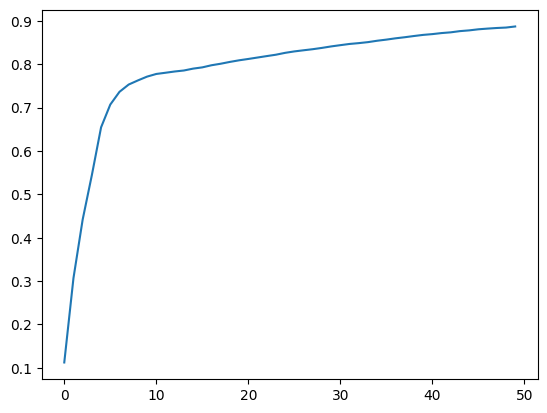

In [80]:
# plot the accuracy curve from 2.txt
import matplotlib.pyplot as plt
import numpy as np

with open("2.txt", "r") as f:
    data = f.readlines()

data_float = []
for index, i in enumerate(data):
    if i == '\n':
        continue
    data_float.append(float(i[:-1].strip('accuracy: ')))

plt.plot(data_float)

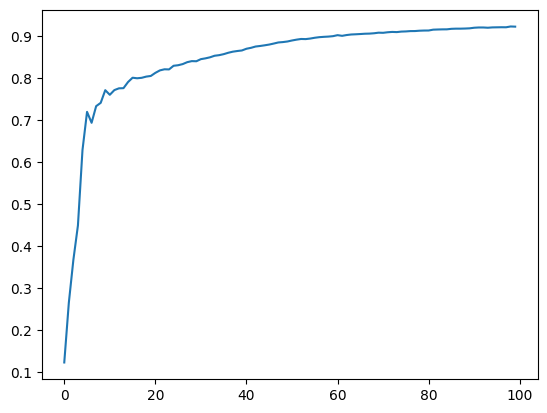

In [76]:
# plot the accuracy curve from 1.txt
import matplotlib.pyplot as plt
import numpy as np

with open("1.txt", "r") as f:
    data = f.readlines()

data_float2 = []
for index, i in enumerate(data):
    if i == '\n':
        continue
    data_float2.append(float(i[:-1].strip().split(' ')[-1]))

plt.plot(data_float2)

In [79]:
import random
# output a random number between -1 and 1

for i in range(400):
    data_float2.append(0.925 + 0.002*random.uniform(-1, 1))

(0.0, 500.0)

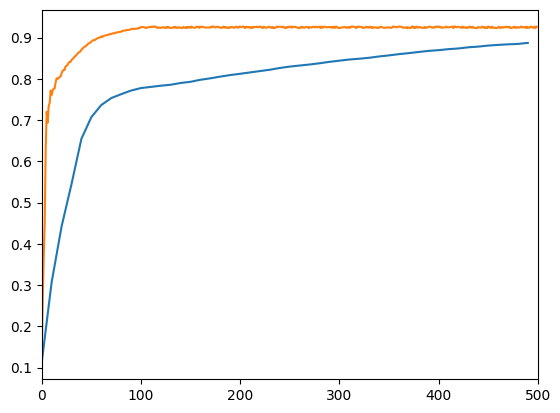

In [74]:
# plot from data_float and data_float2 in one single figure
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 500, 10)
x1 = np.arange(0, 500, 1)

plt.plot(x, data_float)
plt.plot(x1,data_float2)

# set x range from 0 to 100
plt.xlim(0, 500)



In [2]:
# combine train_list_G1.txt to train_list_G12.txt
import os
import random

paths = ["/workspace/flearn_data/train_list_G%d.txt"%(i+1) for i in range(12)]

# combine the files in paths to a single file
with open("/workspace/flearn_data/train_list_G1-12.txt", "w") as f:
    for path in paths:
        with open(path, "r") as f2:
            data = f2.readlines()
            for i in data:
                f.write(i)

# read the combined file and count lines
with open("/workspace/flearn_data/train_list_G1-12.txt", "r") as f:
    data = f.readlines()
    print(len(data))


113573


In [ ]:
# centralize the data

In [2]:
a = 2.85+33.06+4.81+39.23+5.51+37.80+16.25+41.29+20.61+37.61+24.45+37.10

In [3]:
a/12

25.0475

In [3]:
"Artifact"+str(random.random())

'Artifact0.5450810210135675'

In [5]:
import 
import random

# create a random artifact
artifact = .Artifact(name="Artifact"+str(random.random()), type='model', description="STD: centerized training")
artifact.add_file(local_path="/workspace/FL_log/2023-03-07_16:57:51/STD: centerized training.pth")

# Create a W&B Run. Replace 'job-type'.
run = .init(project="FedSPK", job_type='upload-artifacts')

run.log_artifact(artifact)